In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# Week 10 Lecture 2: Finite Differences for PDEs
## Rahman notes:

Consider the heat equation problem in the theory lecture:

$u_t = 2u_{xx};\qquad u(0, t) = u(4, t) = 0;\qquad u(x,0) = 2 - |x-2|$

We can plot the initial condition

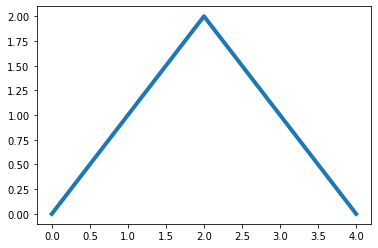

In [ ]:
x = np.arange(0, 4+0.1, 0.1)
y = 2 - np.abs(x-2)
plt.plot(x, y, linewidth = 4)

Now lets use the Crank-Nicolson scheme (the gold standard for finite differences for the heat equation) to solve this.  We saw in the theory lecture that our finite difference scheme simplifies to

$-\mu u_{i+1}^{n+1} + (1+2\mu)u_i^{n+1} - \mu u_{i-1}^{n+1} = \mu u_{i+1}^n + (1-2\mu)u_i^n + \mu u_{i-1}^n$

this indicates we have a tridiagonal system on both sides of the equation, but since we know  we simply do the matrix multiplication to give us a vector on the right hand side.  For more detail take a look at the theory lecture.

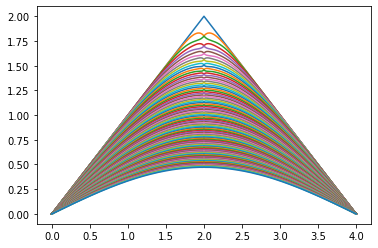

In [ ]:
dt = 0.01
dx = 0.01
x = np.arange(0, 4+dx, dx)
X = len(x)
k = 2

u = 2 - np.abs(x-2)
mu = k*dt/(2*dx**2)

u_a = 0 #Dirichlet boundary conditions
u_b = 0 #Dirichlet boundary conditions

main_diag = (1+2*mu)*np.ones(X-2)
second_diag = -mu*np.ones(X-3)
A = np.diag(main_diag) + np.diag(second_diag, 1) + np.diag(second_diag, -1)

main_diag = (1-2*mu)*np.ones(X-2)
B = np.diag(main_diag) - np.diag(second_diag, 1) - np.diag(second_diag, -1)

t = np.arange(dt, 1+dt, dt)

plt.plot(x,u)

for t in range(len(t)):
    b = B@u[1:-1]
    b[0] = b[0] + mu*u_a
    b[-1] = b[-1] + mu*u_b
    u[1:-1] = scipy.linalg.solve(A, b)
    plt.plot(x,u)

Lets try it with an initial condition that doesn't have a kink.

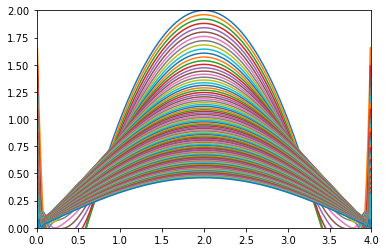

In [ ]:
dt = 0.01
dx = 0.01
x = np.arange(0, 4+dx, dx)
X = len(x)
k = 2

u = 2 - (x-2)**2
mu = k*dt/(2*dx**2)

u_a = 0 #Dirichlet boundary conditions
u_b = 0 #Dirichlet boundary conditions

main_diag = (1+2*mu)*np.ones(X-2)
second_diag = -mu*np.ones(X-3)
A = np.diag(main_diag) + np.diag(second_diag, 1) + np.diag(second_diag, -1)

main_diag = (1-2*mu)*np.ones(X-2)
B = np.diag(main_diag) - np.diag(second_diag, 1) - np.diag(second_diag, -1)

t = np.arange(dt, 1+dt, dt)

plt.plot(x,u)

for t in range(len(t)):
    b = B@u[1:-1]
    b[0] = b[0] + mu*u_a
    b[-1] = b[-1] + mu*u_b
    u[1:-1] = scipy.linalg.solve(A, b)
    plt.plot(x,u)
    plt.axis([0, 4, 0, 2])

Lets try it with different boundary conditions.

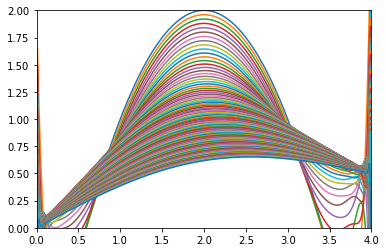

In [ ]:
dt = 0.01
dx = 0.01
x = np.arange(0, 4+dx, dx)
X = len(x)
k = 2

u = 2 - (x-2)**2
mu = k*dt/(2*dx**2)

u_a = 0 #Dirichlet boundary conditions
u_b = 1 #Dirichlet boundary conditions

main_diag = (1+2*mu)*np.ones(X-2)
second_diag = -mu*np.ones(X-3)
A = np.diag(main_diag) + np.diag(second_diag, 1) + np.diag(second_diag, -1)

main_diag = (1-2*mu)*np.ones(X-2)
B = np.diag(main_diag) - np.diag(second_diag, 1) - np.diag(second_diag, -1)

t = np.arange(dt, 1+dt, dt)

plt.plot(x,u)

for t in range(len(t)):
    b = B@u[1:-1]
    b[0] = b[0] + mu*u_a
    b[-1] = b[-1] + mu*u_b
    u[1:-1] = scipy.linalg.solve(A, b)
    plt.plot(x,u)
    plt.axis([0, 4, 0, 2])